In [146]:
'''
Types of computer vision (CV) problems:

binary classification: dog or cat
multiclass classification: cat,dog or chicken
object detection: detect where a cat appears in a video frame
panopic segmentation: find where different objects in an image can be separated


What we will do:
Introduce new parts of the workflow for better results:

torchvision.transforms = used for transforming the data so that it fits a model (pictures are 3,2k,2k, but the model can only handle (256,256))

torch.utils.data.Dataset = used as a better way to store your data(instead of X_train,X_test,...) like the dataframe we used in the beginning
(it has data and labels, and a way of indexing to get different pairs of data and labels)
(so, dataset[i] will return a tensor with some data and labels for 1 element(be that a pixel or a coordinate or something))
also, it impliments lazy loading like a generator so that it can get data on the fly with __get_item__

torch.utils.Data.DataLoader = a python generator that handles batching, shuffling, parallel loading(use multiple loader to speed up load)
, and collation(combingin samples into a batch)


Next the model:
using torch.nn, torch.nn.Module, and torch.nn.models for existing models from torchvision import models, models.alexnet
also torch.optim for optimizers

#then build the training loop
#then evaluate the metrics using the loss function and the torchmetrics accuracy class

#then use torch.utils.tensorboard to improve the model:
tensorboard is a visualization toolkit. IT DOESNT PLOT THE DATA ITSELF, BUT RATHER IT TRACKS THINGS LIKE THE LOSS AND ACCURACY


(DONT WORRY, ALL OF THIS STUFF WILL BE COVERED, JUST NOT IN THIS NOTEBOOK, tensorboard is used in notebook 7, and torchvision.models
is used in the transfer learning page)
'''

'\nTypes of computer vision (CV) problems:\n\nbinary classification: dog or cat\nmulticlass classification: cat,dog or chicken\nobject detection: detect where a cat appears in a video frame\npanopic segmentation: find where different objects in an image can be separated\n\n\nWhat we will do:\nIntroduce new parts of the workflow for better results:\n\ntorchvision.transforms = used for transforming the data so that it fits a model (pictures are 3,2k,2k, but the model can only handle (256,256))\n\ntorch.utils.data.Dataset = used as a better way to store your data(instead of X_train,X_test,...) like the dataframe we used in the beginning\n(it has data and labels, and a way of indexing to get different pairs of data and labels)\n(so, dataset[i] will return a tensor with some data and labels for 1 element(be that a pixel or a coordinate or something))\nalso, it impliments lazy loading like a generator so that it can get data on the fly with __get_item__\n\ntorch.utils.Data.DataLoader = a pyt

In [147]:
'''
For now, lets just get used to these:

torchvision: library for computer vision, contains datasets, model architectures, and image transformations

torchvision.datasets = contains datasets in the form as stated above (integrated with the dataloader)

torchvision.models = wont be used now, but this place stores a lot of computer vision models which are useful

torchvision.transforms = tensor transforms used on images to make them normalized for your model

torch.utils.data.Dataset = said above, but basically an object which you can index into data label pairs
#this returns a sample of data, which is generally (depends on implimentation) but a tuple of form (data,label)
#where data is the feature tensor, and label is the target tensor
batch = data,labels

torch.utils.data.Dataloader = a generator for a Dataset class that handles collation,shuffling,batching,etc
#dataloader wraps a dataset and takes a param for batch size for collation

'''

'\nFor now, lets just get used to these:\n\ntorchvision: library for computer vision, contains datasets, model architectures, and image transformations\n\ntorchvision.datasets = contains datasets in the form as stated above (integrated with the dataloader)\n\ntorchvision.models = wont be used now, but this place stores a lot of computer vision models which are useful\n\ntorchvision.transforms = tensor transforms used on images to make them normalized for your model\n\ntorch.utils.data.Dataset = said above, but basically an object which you can index into data label pairs\n#this returns a sample of data, which is generally (depends on implimentation) but a tuple of form (data,label)\n#where data is the feature tensor, and label is the target tensor\nbatch = data,labels\n\ntorch.utils.data.Dataloader = a generator for a Dataset class that handles collation,shuffling,batching,etc\n#dataloader wraps a dataset and takes a param for batch size for collation\n\n'

In [148]:
#first lets import the dependencies

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models

from torchvision.transforms import ToTensor #this will turn an image into a tensor
import matplotlib.pyplot as plt

#print out your version of python
print(f"Torch version: {torch.__version__},Torchvision version: {torchvision.__version__}")

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device="cpu"

Torch version: 2.5.1,Torchvision version: 0.20.1


In [149]:
#next, lets get our dataset, which is the torchvisions's FashionMNIST
#contains greyscale images of 10 different clothings

#root = where to download
#train = lets you choose between the training and testing data ()
#transform = what transform to apply on the data
#download = whether or not to download it
#target_transform = what transform to run on the targets (labels)

#REMEMBER: FashionMNIST is a subclass of the DataSet object with the path to the data being correct 
# we will make our own datasets later using a similar style (create the dataset and data loader)
train_data = torchvision.datasets.FashionMNIST(
    root="data", #prepends your cwd
    train=True, #gives you the training data
    download=True,
    transform=torchvision.transforms.ToTensor(), #a class that acts like a function when instantiated
    target_transform=None
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)
#fashionmnist is an object (like a dataset, which is indexable and returns a tuple just like torch.utils.data.Dataset)
train_data[0][0].shape,train_data[0][1],train_data,train_data[0]
#so each element in train_data is a tuple (data,label)
#where data is a (1,28,28) tensor and label is an int corresponding with its class




(torch.Size([1, 28, 28]),
 9,
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
      

In [150]:
#lets look at the data
image,label = train_data[0] #doing this will automatically iterate through the tuple and set each value in order
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [151]:
#input and output shapes:
image.shape #(1,28,28) or (color_channels,rows,cols)
#NOTE: this is not set in stone! each dataset uses a different way of representing images
#can be (N,H,W,C), or (N,C,H,W) , and in batches: (batch_size,num_colors,height,width) n is batch_size
#outputs will be in the form (10,) of prediction probabilities or origionally logits (need to transform of course)
#for a batch of 32, dataloader will output batches in the form (32,1,28,28)
#note that (NHWC) preforms slightly better but (NCHW) is more standard

torch.Size([1, 28, 28])

In [ ]:
#see how many samples there are
#remember len returns the number of elements in the first dimension of a tensor
#and .targets returns a tensor holding all of the data in the Dataset object (overridded dataset obj with self.data, self.targets, self.classes)
print(len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets))

60000 60000 10000 10000


In [153]:
#you can find the classes with the .classes attribute
#also, looks like targets is a list, not a tensor

'''
NOTE: Dataset is an abstract class, only implimenting __get_item__(self,idx) and __init__(self), the .classes, .data, and .targets is part of some 
torchvision.datasets classes which are subclasses of the Dataset abstract class
'''


class_names = train_data.classes #returns a list of all the classes, in order by index
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

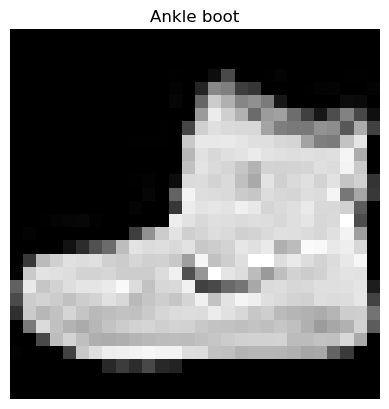

In [154]:
#graphing these shapes using matplotlib:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="grey")#must be 2d array, or two arrays
plt.axis(False)
plt.title(class_names[label])

#REMEMBER: each element in the image tensor is the double from 0 to 1 representings its color, and its corresponding
#row and column are its position in the image

#also, imshow is not the same as plot!! plot is for 1d data, imshow is for 2d!
#imshow takes a 2d matrix and displayes it as an image
#each element is mapped to a pixel, and its color is determined by its value and the chosen colormap

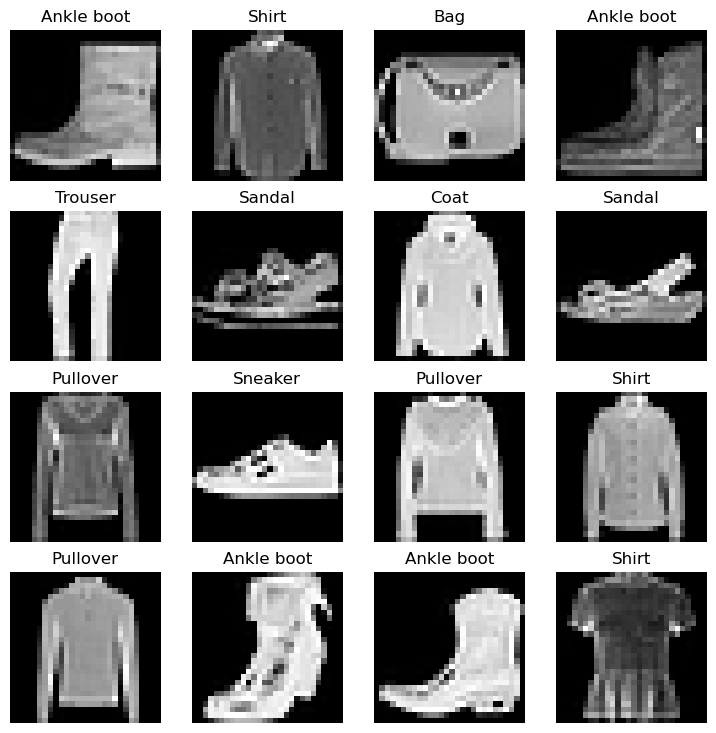

In [155]:
#2d array of images:
import matplotlib.pyplot as plt

rows,cols = 4,4
torch.manual_seed(42)
plt.figure(figsize=(9,9))

for i in range(1,rows*cols+1):
    random_idx = torch.randint(low=0,high=len(train_data),size=[1]).item()
    image,label = train_data[random_idx] #this returns a tuple of data,target
    title = class_names[label]
    plt.subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="grey")
    plt.title(title)
    plt.axis(False)
    



In [ ]:
#now, lets get the dataloader ready:
from torch.utils.data import DataLoader
#dataloader wraps a dataset, and turns it into an iterable that spits out smaller chunks called batches, set by batch_size
# of shape (32,1,28,28) where 32 is just the common batch size
#WHY: more opportunities to calculate the gradient and loss to make model better!
#NOW: batch the dataloader with batch_size = 32, and shuffle to on

BATCH_SIZE = 32
#shuffle is just whether you go in order by indexes, or if you go out of order (better to shuffle bc data is not temporal)
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=True)

#see what we created:
print(f"Dataloaders are: {train_dataloader} and {test_dataloader}")
print(f"Length of Training Dataloader: {len(train_dataloader)} with batch size of {BATCH_SIZE}")
print(f"Length of Testing Dataloader: {len(test_dataloader)} with batch size of {BATCH_SIZE}")

#REMEMBER: Dataloaders are iterable (like lists), but not indexable (unlike lists which are)
#NOTE: Dataloader does support lazy loading, meaning it only loads the current batch into memory
#NOTE: HOW: dataloader wraps a dataset object, so when you need that it just indexes in the dataset object using __get_item__ and then collates
#HOWEVER!!! len still works bc internally it calls len(self.dataset)
#NOTE: Dataloader is a concrete class, not an abstract one(abstract classes declare but do not define methods)
#needs the @abstractmethod decorator to make it an abstract class! even without a constructor, it will use the defautl
#you rarely subclass dataloader, but often do for Dataset (which is the self.dataset object needed in the constructor)

#NOTE: for batch in Dataloader works because this implicitly calls __iter__ on dataloader and cycles through all the yielded values.
# Datalaoder returns a BaseDataLoaderIter object, which uses has a next() and iter() method (the iter() here just returns itself)

#NOTE: a generator object, meanwhile, is a special type of iterator that used yeild, 
#NOTE: under the hood, python creates a __iter__ and __next__ method for it, and calls it under the hood when you iterate through it
#the for x in a loop works by calling next and setting the value ot x for the body of the loop untill the iterator throws a StopIteration exception, when it breaks

#YOU CAN STILL CALL NEXT AND ITER ON A GENERATOR, JUST THAT NEXT RETURNS THE NEXT YIELD VALUE AND ITER RETURNS SELF, UNTILL STOPITERATION EXCEPTION THROWN


Dataloaders are: <torch.utils.data.dataloader.DataLoader object at 0x3640617f0> and <torch.utils.data.dataloader.DataLoader object at 0x12145d040>
Length of Training Dataloader: 1875 with batch size of 32
Length of Testing Dataloader: 313 with batch size of 32


In [ ]:
#lets see whats inside the train_dataloader:

#NOTE: ITERABLE DOES MEAN IT IS AN ITERATOR!!! THE __ITER__() JUST RETURNS AN ITERATOR FOR THE OBJECT
#iterator is the object that impliments the __next__() function to go through it
# reason Dataset and Dataloader are separate is bc dont want the batch size in the dataset. (indexable vs iterable)
# Dataloader vs DataLoaderIterator: good to have a separate object so that multiple iterators can walk through an iteratable object at once
# Dataloader is still indexable, only each index is split into batches (as shown by the len(dataloader))

#NOTE: the ITERATOR wraps the ITERABLE

#NOTE: how does the sampling work?
# Dataloader creates a samples called random_sampler that stores a random series of indicies for the current epoch
# the iterator then returned by dataloader then fetches these indicies 
#EVERY TIME YOU CREATE A NEW ITERATOR, random_sampler WILL CREATE A NEW SERIES OF INDICIES FOR THE ITERATOR TO USE
#THATS WHY ITS GOOD TO SEPARATE THE ITERABLE AND THE ITERATOR, SINCE THIS WAY YOU CAN CHANGE THE WAY YOU WALK THROUGH THE DATA
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

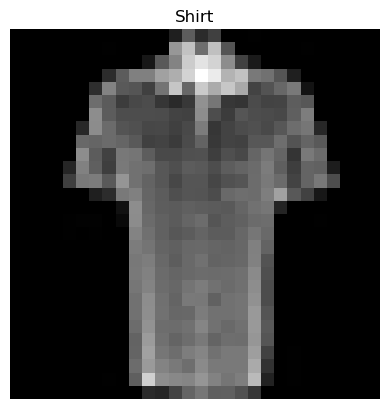

In [158]:
#check a single sample to show that the data is unchanged

torch.manual_seed(42)
random_idx = torch.randint(low=0,high=len(train_features_batch),size=(1,)).item()
image,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(image.squeeze(),cmap="grey")
plt.title(class_names[train_labels_batch[random_idx]])
plt.axis(False)


In [159]:
#at this point, we have the dataloader object that with the batch number set to create the iterators through the data
# where each iterator will return a tuple representing one batch, with the first element being the (32,1,28,28,28) features data
#and the second is the (32) labels data
#now lets build a model to interpret this data

#for the baseline, we will use two linear layers, but with an nn.Flatten() which compresses the dimension of a tensor into a single one
#basically just creates a tensor array with teh data stored as it is in memory based on the stride

#NOTE:all nn modules function as a model, and just subclass nn.Module
#NOTE: what it does: it flattend all dimension except the batch: (32,1,28,28) -> (32,1*28*28)
#this transforms our pixel data into a long features vector, which works better with nn.Linear
flatten_model = nn.Flatten()

x = train_features_batch[0] #just the tuple returned by the first next of the iterator

output = flatten_model(x)

print(f"The initial shape of the data was: {x.shape}")
print(f"Now, its in the form: {output.shape}")

The initial shape of the data was: torch.Size([1, 28, 28])
Now, its in the form: torch.Size([1, 784])


In [160]:
#Finally, lets make the model

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape: int,output_shape: int,hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    
model_0 = FashionMNISTModelV0(
    input_shape=784,# the size of the imput
    output_shape=len(class_names),
    hidden_units=10 #the nodes in between
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [161]:
#get the loss function and optimizers (also be sure to get the torchmetrics.classificaiton Accuracy )
from torchmetrics.classification import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()#workds on logits
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [162]:
#NEW: create a function to time your experiments:
from timeit import default_timer as timer

def print_train_time(start: float,end: float,device: torch.device = None):
    #start is float for starttime in timeit format
    #end is the end time
    #device is on what device it trained, used for the print
    total_time = end-start
    print(f"Time to train on {device} was {total_time:.3f} seconds")
    return total_time


In [163]:
#lets just import the accuracy function to do a blindshot and see whats up
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("Skipping download")
else:
    request = requests.get("asdfasdf")
    with open("helper_functions.py",mode="wb",newline="") as file:
        file.write(request.content)
from helper_functions import accuracy_fn


Skipping download


In [164]:
#homemade accuracy function:
def accuracy_function(predicted_batch_labels: torch.Tensor,actual_batch_labels: torch.Tensor):
    number_correct = torch.eq(predicted_batch_labels,actual_batch_labels).sum().item()
    return (number_correct / len(predicted_batch_labels)) * 100

In [165]:
#lets do a shot in the dark test to see how our model preforms:
with torch.inference_mode():
    model_0.eval()
    blind_features_batch,blind_labels_batch = next(iter(train_dataloader))
    y_blind_logit_preds = model_0(blind_features_batch)
    y_blind_preds = torch.softmax(y_blind_logit_preds,dim=1).argmax(dim=1)
    #now, lets see how it preformed:
    blind_accuracy = accuracy_function(predicted_batch_labels=y_blind_preds,actual_batch_labels=blind_labels_batch)
    print(f"The current, untrained accuracy for a random batch is {blind_accuracy}, which is {"Booty" if blind_accuracy < (100/len(class_names)) else "Good"}")
    

The current, untrained accuracy for a random batch is 3.125, which is Booty


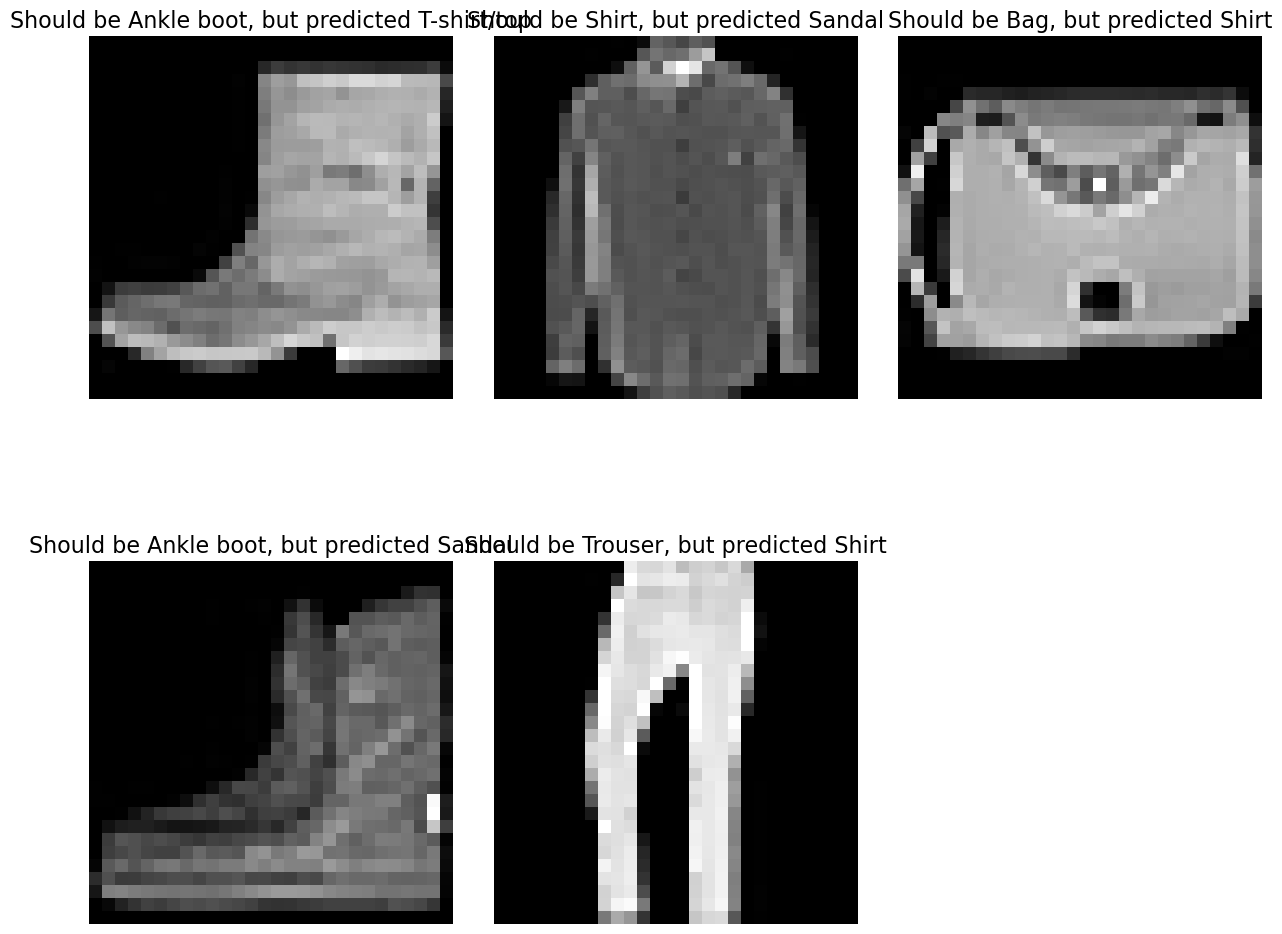

In [166]:
#lets do a quick plot to see the randomly predicted data
NUM_DISPLAY = 5
rows = int(torch.sqrt(torch.Tensor([NUM_DISPLAY])).item())
cols = int(NUM_DISPLAY/rows)+1
fig = plt.figure(figsize=(12,12))
torch.manual_seed(42)
for i in range(1,NUM_DISPLAY+1):
    random_idx = torch.randint(0,len(train_data),size=(1,)).item()
    image,label = train_data[random_idx] #image is size (1,28,28), label is an int size (1)
    plt.subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="grey")
    fig.tight_layout(pad=1.0) #helps make more space between subplots
    #plt.subplots_adjust(wspace=2.0,hspace=0.3)
    #find the title that the model predicts
    #NOTE: the flatten turns everything into the shape (batch,-1) WHERE -1 MEANS INFER THE NUMBER FOR THAT DIMENSION, in other words (batch,a) where depends
    y_blind_logit_preds = model_0(image.unsqueeze(dim=0)) #NOTE: for multicolored data, the flatten will turn this into (3,-1), not the (1,-1) intented!!! were just lucky the 1 color channel is the same 1 needed for the batch size
    y_blind_preds = torch.softmax(y_blind_logit_preds,dim=1).argmax(dim=1).item() #since will be just one int
    plt.title(f"Should be {class_names[label]}, but predicted {class_names[y_blind_preds]}",fontsize=80/NUM_DISPLAY)#NOTE: fontsize attribute useful
    plt.axis(False)



In [167]:
#now the PATHS:
from pathlib import Path
from datetime import datetime


#these you gotta change and rerun depending on the model!
MODEL_NAME = "UNIT3_MODEL0"
EXPERIMENT_NAME = "Exp1_CPU"

now = datetime.now()
TIMESTAMP = f"{now.month}_{now.day}_{str(now.year)[-2:]}_@_{now.strftime("%I_%M_%S%p")}"

#base directory
BASE_DIR = Path(MODEL_NAME)
EXPERIMENT_DIR = BASE_DIR / EXPERIMENT_NAME

#other dirs
MODEL_DIR = EXPERIMENT_DIR / "models"
RESULTS_DIR = EXPERIMENT_DIR / "results"
GRAPHS_DIR = EXPERIMENT_DIR / "graphs"
LOSS_GRAPH_DIR = GRAPHS_DIR / "loss"
ACC_GRAPH_DIR = GRAPHS_DIR / "accuracy"

for directory in [MODEL_DIR,RESULTS_DIR,GRAPHS_DIR,LOSS_GRAPH_DIR,ACC_GRAPH_DIR]:
    directory.mkdir(parents=True,exist_ok=True)

MODEL_PATH = MODEL_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
RESULTS_PATH = RESULTS_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
LOSS_GRAPH_PATH = LOSS_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
ACC_GRAPH_PATH = ACC_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"






In [168]:
#training loop: remember to use the tqdm to track the epochs better:
from tqdm.auto import tqdm
import csv
from torchmetrics.classification import Accuracy
torch.manual_seed(42)
start_time_on_cpu = timer()
device = "cpu" #FOR NOW

EPOCHS = 10

with open(file=RESULTS_PATH,mode="w",newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch","Training Loss","Testing Loss","Training Accuracy","Testing Accuracy"])
    #define the accuracy objects
    training_accuracy = Accuracy(task="multiclass",num_classes=len(class_names)).to(device)
    testing_accuracy = Accuracy(task="multiclass",num_classes=len(class_names)).to(device)

    #now the actual loop:
    for epoch in tqdm(range(EPOCHS)):
        print(f"Epoch: {epoch}\n-------")

        #now, the new part with batches:
        train_loss = 0
        test_loss = 0
        #NOTE: explanation
        # iter() makes an iterator over the iterable, and next() manually gives you the next item
        #an enumerator is like an iterator, but instead of just giving you the item, it gives you the item but wrapped with an index in a tuple
        # otherwise, it behaves just like a normal iterator! meaning you can loop through it and it implicitly calls next.
        #AN ENUMERATE IS JUST AN ITERATOR THAT WRAPS THE OUTPUT IN A TUPLE WITH AN INDEX

        #YIELD VS RETURN: a function with return runs once and gives a single value
        # yield on the other hand, is like a return but instead of resetting the function it just pauses right after the first yield
        # then by calling next(generator), it continues to the next yield
        #so def foo() { yield 1 yield 2 yield 3}, the first next will yield 1 then 2 then 3, but running foo() will return nothing since python
        #just sees a generator object

        #enumerate is a generator like object, specifically an iterator
        #enumerate(train_dataloader) returns tuple (index,data)
        #data is of form (batch_features,batch_labels)
        #batch_features is form (32,1,128,128) or (NCHW)
        #batch_labels = (32,)


        #NOTE: for accuracy, use reset() and compute().item() every epoch, but update every batch
        training_accuracy.reset()
        testing_accuracy.reset()


        for batch,(training_batch_features,training_batch_labels) in enumerate(train_dataloader):
            model_0.train()

            #NOTE: calling loss = loss_fn(), this will return a float of the loss, but internally will create a loss tensor (the root tensor of the graph)
            #note: each tensors has a .grad, .grad_fn, and .requres_grad flag
            #.grad is the current gradient with respect to the loss function (calculated when using loss.backwards())
            # .gran_fn holds a function object that stores how it was created, exe: if b = a*2, b.grad_fn is AddBackward0
            #which stores references to inputs, and a backwards() function that computes gradients
            #autograd calls the backwards starting from the loss tensor and going to the leaf tensors

            #now the regular testing loop begins:
            #forward pass on the data:
            y_logit_preds = model_0(training_batch_features) #output is (32,10)
            y_preds = torch.softmax(y_logit_preds,dim=1).argmax(dim=1) #now (32,) predictions labels (not prediction probabillities)

            batch_loss = loss_fn(y_logit_preds,training_batch_labels)
            train_loss += batch_loss

            training_accuracy.update(y_preds,training_batch_labels)#update the accuracy

            #now the basic stuff

            optimizer.zero_grad()

            batch_loss.backward()

            optimizer.step()
            if batch % 400 == 0:
                print(f"Looked at ({batch*len(training_batch_features)} / {len(train_data.data)}) samples")

        #now teh testing loop:
        train_loss /= len(train_dataloader) #there will be like 1800 batches
        with torch.inference_mode():
            model_0.eval()
            #now, do the same thing for the testing data:

            for batch,(testing_batch_features,testing_batch_labels) in enumerate(test_dataloader):
                y_test_logit_preds = model_0(testing_batch_features) #form (32,10)
                test_batch_loss = loss_fn(y_test_logit_preds,testing_batch_labels)
                y_test_preds = torch.softmax(y_test_logit_preds,dim=1).argmax(dim=1)#tensor for (32,)

                test_loss += test_batch_loss
                testing_accuracy.update(y_test_preds,testing_batch_labels)
    
            #now, lets print the results at the end of the epoch to the csv file for storage
            test_loss /= len(test_dataloader) #divides the testing loss by the number of batches
    
            writable_training_loss = train_loss.detach().cpu().numpy()
            writable_testing_loss = test_loss.detach().cpu().numpy()
            writable_training_accuracy = training_accuracy.compute().item()
            writable_testing_accuracy = testing_accuracy.compute().item()

            #now the write:
            writer.writerow([epoch,writable_training_loss,writable_testing_loss,writable_training_accuracy,writable_testing_accuracy])

            #now the every so often print:
    
            print(f"Epoch: {epoch} | Training Loss: {writable_training_loss} | Testing Loss: {writable_testing_loss} | Training Accuracy: {writable_training_accuracy} | Testing Accuracy: {writable_testing_accuracy}")

end_time_on_cpu = timer()
total_train_time = print_train_time(start=start_time_on_cpu,end=end_time_on_cpu,device="cpu")













  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at (0 / 60000) samples
Looked at (12800 / 60000) samples
Looked at (25600 / 60000) samples
Looked at (38400 / 60000) samples
Looked at (51200 / 60000) samples
Epoch: 0 | Training Loss: 0.5948367714881897 | Testing Loss: 0.517036497592926 | Training Accuracy: 0.789900004863739 | Testing Accuracy: 0.8181999921798706
Epoch: 1
-------
Looked at (0 / 60000) samples
Looked at (12800 / 60000) samples
Looked at (25600 / 60000) samples
Looked at (38400 / 60000) samples
Looked at (51200 / 60000) samples
Epoch: 1 | Training Loss: 0.47741496562957764 | Testing Loss: 0.5343256592750549 | Training Accuracy: 0.8316666483879089 | Testing Accuracy: 0.8141000270843506
Epoch: 2
-------
Looked at (0 / 60000) samples
Looked at (12800 / 60000) samples
Looked at (25600 / 60000) samples
Looked at (38400 / 60000) samples
Looked at (51200 / 60000) samples
Epoch: 2 | Training Loss: 0.4555200934410095 | Testing Loss: 0.5168395042419434 | Training Accuracy: 0.8407666683197021 | Testing Accu

In [169]:
#Now, lets make predictions and get Model_0 results:
torch.manual_seed(42)
def evaluate_model(model: torch.nn.Module,dataloader: torch.utils.data.DataLoader,loss_funct: torch.nn.Module,accuracy_funct):
    #the goal of this method is to standardize model comparisons, so lets take the model, use teh dataloader to do a forward pass through the
    #data for everything in the dataloader, then calculat ethe loss and accuracy after every batch, and see whats up
    #returns a dictionary with the results:
    epoch_loss,epoch_acc = 0,0
    model.eval()
    with torch.inference_mode():
        #only doing one epoch, so:

        for (batch_evaluation_features,batch_evaluation_labels) in test_dataloader:
            y_eval_logit_preds = model(batch_evaluation_features) #where output is (32,10)
            #NOTE:ERRLOG:Dimension out of range (expected to be in range of [-1, 0], but got 1)
            # -1 dim means infer, and 0 means 0, but it got dim1, essentiall there is a tensor size problem
            #problem was that you wrote argmax instead of softmax
            y_eval_preds = torch.softmax(y_eval_logit_preds,dim=1).argmax(dim=1) #size (32,) with prediction indexes

            batch_eval_loss = loss_funct(y_eval_logit_preds,batch_evaluation_labels).detach().cpu().numpy()
            batch_eval_acc = accuracy_funct(y_eval_preds,batch_evaluation_labels)

            epoch_loss += batch_eval_loss
            epoch_acc += batch_eval_acc
        epoch_loss /= len(dataloader)
        epoch_acc /= len(dataloader)


        #can use teh __class__.__name__ to return just the name of the class
        results_dict = {
            "model_name": f"{model.__class__.__name__}",
            "model_loss": epoch_loss,
            "model_accuracy": epoch_acc
        }
        return results_dict
    
#NOTE: to pass a function, dont put the parenthesis after it, thats for calling it
model_0_results = evaluate_model(model=model_0,dataloader=test_dataloader,loss_funct=loss_fn,accuracy_funct=accuracy_function)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46141330678813375,
 'model_accuracy': 83.95567092651757}

In [170]:
#we will do the same thing, but with the GPU:
from timeit import default_timer as timer 
import time
start = timer()
time.sleep(1)
end = timer()
print_train_time(start=start,end=end,device="gpu")

#set the device to gpu now:
if torch.cuda.is_available():
    device="cuda"
elif torch.backends.mps.is_available():
    device="mps"
else:
    device="cpu"
print(f"Device is {device}")

Time to train on gpu was 1.000 seconds
Device is mps


In [171]:
#Now, lets add some Non-Linearity into our model using ReLU:

class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_features,output_features,hidden_units):
        super().__init__()
        self.sequential1 = nn.Sequential(
            nn.Flatten(),#flattens the tensors to form (n,-1) #-1 means infer dimensions.
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(), #ReLU takes the tensor, and sets teh negative values to 0 and the positive are left alone
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features) 
        )
    def forward(self,X: torch.Tensor) -> torch.Tensor:
        return self.sequential1(X)

#lets find the dimension of the tensor:
(image,label) = train_data[0]
input_shape = image.numel()
output_shape = len(class_names)
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_features=input_shape,output_features=output_shape,hidden_units=10).to(device)
model_1


FashionMNISTModelV1(
  (sequential1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [180]:
#loss, optimizer, and evaluation metrics:
from torchmetrics.classification import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

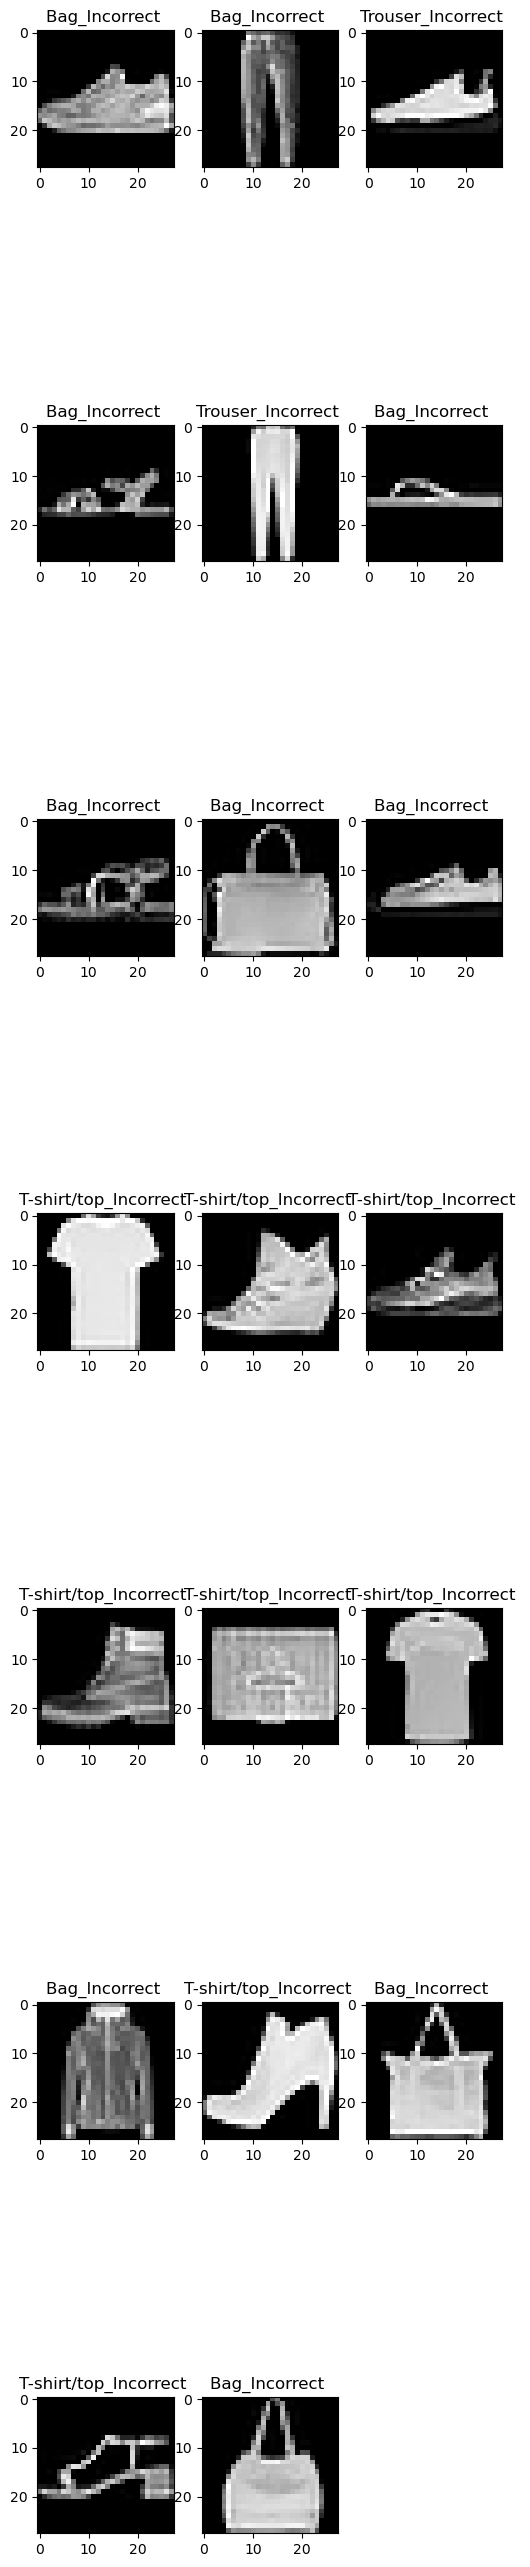

In [173]:
#now, we can do a deadshot through our model to see whats up:
import math

#NOTE: 20/3 returns a float by default (python allways tries to avoid data loss), for integer division, use 20//3
with torch.inference_mode():
    NUM_DISPLAY = 20
    cols = 3
    rows = int(math.ceil(NUM_DISPLAY / cols)) #in this case, will be 
    plt.figure(figsize=(cols*2,rows*5))
    for i in range(1,NUM_DISPLAY+1):
        (image,label) = test_data[torch.randint(0,len(test_data),size=(1,)).item()]
        plt.subplot(rows,cols,i)
        plt.imshow(image.squeeze(),cmap="grey")
        correct_class_name = class_names[label]
        predicted_class_idx = torch.softmax(model_1(image.unsqueeze(dim=0).to(device)),dim=1).argmax(dim=1)
        predicted_class_name = class_names[predicted_class_idx]
        plt.title(f"{f"{correct_class_name}_Correct" if predicted_class_idx == correct_class_name else f"{predicted_class_name}_Incorrect"} ")



In [174]:
#because im a torchmetrics glazer, lets make a loss tracking class that functions identically to the torchmetrics one:
#NOTE: in industry is it common to use train_one_epoch, test_one epoch(aka evaluate) to minimize monolithic code
#also evaluate, which is used at the end of the loop to see how the model behaved
#also save_checkpoint so you dont loose your work :(
#okay! ALSO THE IDEA WITH CREATING AN OBJECT TO STORE THE LOSS IS STUPID BC ITS JUST WASTING MEMORY, JUST RETURN THE AVERAGE AFTER EVERY EPOCH BUB!

In [175]:
#now, the path is already made, so lets start the training loop, and remember to use the timeit default_timer to get the floats at the start and end
#instead of one big train/test loop, lets make smaller training and testing methods
#train_step and test_step, which is just the process for one epoch of training and testing.
import torchmetrics

def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,loss_funct: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_obj_training: torchmetrics.classification.Accuracy,device: torch.device):
    #this assumes that the above were defined, so there already is an accuracy object created for the data and on the same device
    #also, this will not call the update or the print
    #NOTE: for accuracy, you need to accumulate states (need to know how it did for all batches simultaneously to compute)
    #FOR loss, its already a number, so just add and average



    #ALSO, REMEMBER TO MOVE THE MODEL TO THE GPU!!!
    model.to(device)
    accuracy_obj_training.to(device)



    accuracy_obj_training.reset()#assume nobody did this for you. also .compute returns a single scalar tensor
    epoch_loss = 0 #functionally reseting it
    
    #NOTE: the dataloader is an iterable, not an indexable list like dataset.
    #very convenient, since it doesn't just collate batch_size number of dataset outputs, but also shuffles and collates the output in a more
    #useful way (at some point, like next lab I will prob need to write my own dataloader:()
    for (training_batch_features,training_batch_labels) in iter(dataloader):

        #REMEMBER TO MOVE THE DATA TO THE GPU!!!!
        #NOTE: MOVE ONE BATCH AT A TIME TO PRESERVE GPU MEMORY, WHICH IS LIMITED AS IT IS
        training_batch_features,training_batch_labels = training_batch_features.to(device),training_batch_labels.to(device)

        #first, forward pass:
        y_train_logit_preds = model(training_batch_features) #returns (32,10)
        y_train_preds = torch.softmax(y_train_logit_preds,dim=1).argmax(dim=1)

        #find the loss value:
        batch_train_loss = loss_funct(y_train_logit_preds,training_batch_labels) #training_batch_labels is shape (32,), this is a tensor mind you

        #add the loss and accuracy valeus
        epoch_loss += batch_train_loss
        accuracy_obj_training.update(y_train_preds,training_batch_labels)



        #zero the gradients:
        optimizer.zero_grad()

        #then, do abackwards pass through the data:
        batch_train_loss.backward()

        #lastly, step the optimizer:
        optimizer.step()
    epoch_loss =  (epoch_loss.detach().cpu()) / len(dataloader)
    accuracy = accuracy_obj_training.compute().item()

    train_results = {
        "Training Loss": epoch_loss,
        "Training Accuracy": accuracy
    }
    return train_results

In [182]:
#now the test step function:

def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,loss_funct: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_test_obj: torchmetrics.classification.Accuracy,device: torch.device):
    #same structure as the train:
    with torch.inference_mode():
        model.eval()

        model.to(device)
        accuracy_test_obj.to(device)

        epoch_loss = 0
        accuracy_test_obj.reset()

        for (testing_batch_features,testing_batch_labels) in iter(test_dataloader):

            #MOVE THE DATA TO THE GPU
            testing_batch_features,testing_batch_labels = testing_batch_features.to(device),testing_batch_labels.to(device)

            #forward pass:
            y_test_logit_preds = model(testing_batch_features) #size (32,10)
            y_test_preds = torch.softmax(y_test_logit_preds,dim=1).argmax(dim=1) #form (32,)

            #calculate the loss and accuracy:
            test_batch_loss = loss_funct(y_test_logit_preds,testing_batch_labels) #will softmax for your
            epoch_loss += test_batch_loss
            accuracy_test_obj.update(y_test_preds,testing_batch_labels)

        epoch_loss = (epoch_loss.detach().cpu()) / len(dataloader)
        accuracy = accuracy_test_obj.compute().item()

        test_results = {
            "Testing Loss": epoch_loss,
            "Testing Accuracy": accuracy
        }
        return test_results

            



In [183]:
#Now, lets impliment a save checkpoint function to save the state of where we were. Best way is to use the torch.save to save a dict that contains the 
#epoch, model's state dict, and optimizer's state dict

def save_checkpoint(epoch: int, model: torch.nn.Module, optimizer: torch.optim.Optimizer, checkpoint_dir: Path):
    

    checkpoint_name = f"CHECKPOINT_{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}_FOR_EPOCH_{epoch}"
    checkpoint_path = checkpoint_dir / checkpoint_name

    checkpoint = {
        "Epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict()
    }
    torch.save(obj=checkpoint,f=checkpoint_path)
    print(f"Successfully Saved Checkpoint at Epoch {epoch}")


In [ ]:
#now, the train, test loop using our helper functions

from tqdm import tqdm
from timeit import default_timer as timer 
import csv

#
epochs = 10
gpu_start_time = timer()

with open(file=RESULTS_PATH,mode="w",newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch","Training Loss","Testing Loss","Training Accuracy","Testing Accuracy"])

    for epoch in tqdm(range(epochs)):
        #create the accuracy objects:
        training_accuracy_object = torchmetrics.classification.Accuracy(task="MULTICLASS",num_classes=len(class_names))
        testing_accuracy_object = torchmetrics.classification.Accuracy(task="MULTICLASS",num_classes=len(class_names))

        train_results = train_step(model = model_1,dataloader=train_dataloader,loss_funct=loss_fn,optimizer=optimizer,accuracy_obj_training=training_accuracy_object,device=device)

        test_results = test_step(model=model_1,dataloader=test_dataloader,loss_funct=loss_fn,optimizer=optimizer,accuracy_test_obj=testing_accuracy_object,device=device)

        #Now, lets try to impliment an evaluate, save_checkpoint every 10 epochs, and also dont forget to write to the results file

        writer.writerow([epoch,train_results["Training Loss"],test_results["Testing Loss"],train_results["Training Accuracy"],test_results["Testing Accuracy"]])

        print(f"Epoch: {epoch} | Training Loss: {train_results["Training Loss"]} | Testing Loss: {test_results["Testing Loss"]} | Training Accuracy: {train_results["Training Accuracy"]} | Testing Accuracy: {test_results["Testing Accuracy"]}")

        if epoch % 10 == 0:
            save_checkpoint(model=model_1,optimizer=optimizer,checkpoint_dir=MODEL_DIR,epoch=epoch)
            
    
    
    #use the save_checkpoint builtin to save every 10 epochs:




 10%|█         | 1/10 [00:07<01:08,  7.62s/it]

Epoch: 0 | Training Loss: 0.4231070876121521 | Testing Loss: 0.47601255774497986 | Training Accuracy: 0.8489166498184204 | Testing Accuracy: 0.8323000073432922
Successfully Saved Checkpoint at Epoch 0


 20%|██        | 2/10 [00:14<00:59,  7.43s/it]

Epoch: 1 | Training Loss: 0.41416335105895996 | Testing Loss: 0.45100080966949463 | Training Accuracy: 0.850350022315979 | Testing Accuracy: 0.8396999835968018


 30%|███       | 3/10 [00:22<00:51,  7.37s/it]

Epoch: 2 | Training Loss: 0.40469977259635925 | Testing Loss: 0.4815008342266083 | Training Accuracy: 0.8540499806404114 | Testing Accuracy: 0.8294000029563904


 40%|████      | 4/10 [00:28<00:41,  6.97s/it]

Epoch: 3 | Training Loss: 0.39908474683761597 | Testing Loss: 0.45392489433288574 | Training Accuracy: 0.8572499752044678 | Testing Accuracy: 0.8367000222206116


 50%|█████     | 5/10 [00:34<00:33,  6.76s/it]

Epoch: 4 | Training Loss: 0.3924716114997864 | Testing Loss: 0.4384981691837311 | Training Accuracy: 0.8581166863441467 | Testing Accuracy: 0.8445000052452087


 60%|██████    | 6/10 [00:41<00:26,  6.67s/it]

Epoch: 5 | Training Loss: 0.39117535948753357 | Testing Loss: 0.434043288230896 | Training Accuracy: 0.8597333431243896 | Testing Accuracy: 0.8446999788284302


 70%|███████   | 7/10 [00:47<00:19,  6.52s/it]

Epoch: 6 | Training Loss: 0.38333025574684143 | Testing Loss: 0.4398728609085083 | Training Accuracy: 0.8608999848365784 | Testing Accuracy: 0.843500018119812


 80%|████████  | 8/10 [00:53<00:12,  6.37s/it]

Epoch: 7 | Training Loss: 0.38381680846214294 | Testing Loss: 0.43326371908187866 | Training Accuracy: 0.8616999983787537 | Testing Accuracy: 0.847000002861023


 90%|█████████ | 9/10 [00:59<00:06,  6.29s/it]

Epoch: 8 | Training Loss: 0.3762018084526062 | Testing Loss: 0.4242039918899536 | Training Accuracy: 0.8637499809265137 | Testing Accuracy: 0.8511999845504761


100%|██████████| 10/10 [01:05<00:00,  6.59s/it]

Epoch: 9 | Training Loss: 0.3739054799079895 | Testing Loss: 0.45836174488067627 | Training Accuracy: 0.8640999794006348 | Testing Accuracy: 0.8395000100135803


In [ ]:
#now, lets use the eval funciton to evaluate the model
model_1_results = evaluate_model(model=model_1.cpu(),dataloader=test_dataloader,loss_funct=loss_fn,accuracy_funct=accuracy_fn)
model_1_results

#IN THE FUTURE, JUST PASS THE DEVICE TO THE EVALUATE MODEL FUNCTION TO MOVE EVERYTHING TO THE SAME DEVICE

#PROBLEM: overfitting! WE ARE OVERFITTING THE DATA! to fix, smaller or different model, or a larger dataset

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45832388471966734,
 'model_accuracy': 83.96565495207668}

In [ ]:
#NOW THE BIG DADDY, CNNs!